Reading file: /content/drive/MyDrive/sumo_simulation_data/simulation_results_1.csv
Reading file: /content/drive/MyDrive/sumo_simulation_data/simulation_results_2.csv
Reading file: /content/drive/MyDrive/sumo_simulation_data/simulation_results_3.csv
Reading file: /content/drive/MyDrive/sumo_simulation_data/simulation_results_4.csv
                      Scenario Vehicle Type  Vehicle Count  \
0              No Yellow Light          car           1827   
1    No Yellow Light - Overall    All Types           1827   
2            With Yellow Light          car           1884   
3  With Yellow Light - Overall    All Types           1884   
4              No Yellow Light          car           1670   

   Avg Trip Duration (s)  Avg Waiting Time (s)  Avg Fuel Consumption (ml)  \
0                  47.18                 11.74                     890.27   
1                  47.18                 11.74                     890.27   
2                  45.85                 11.68                  

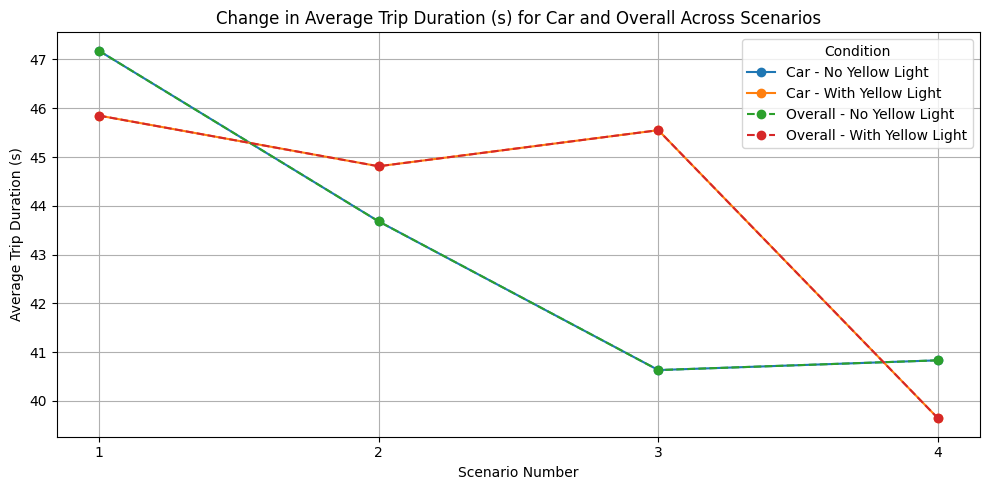

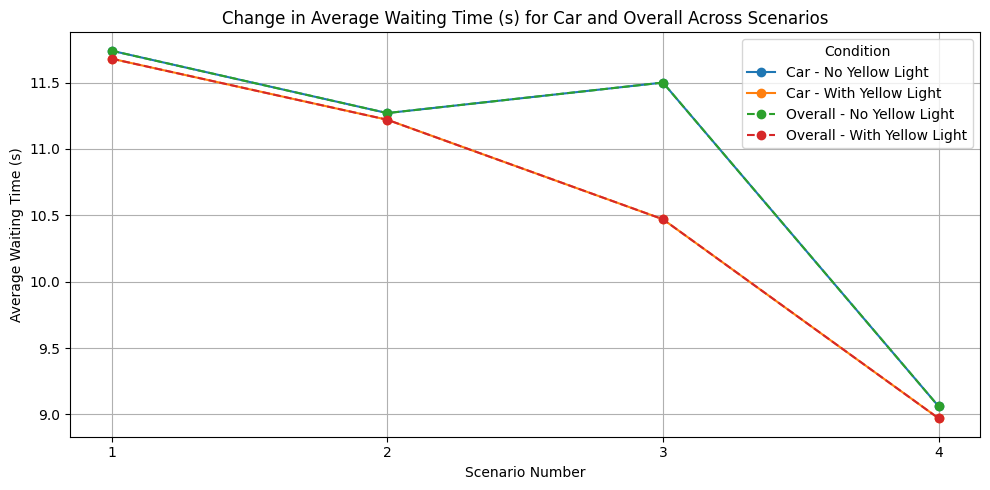

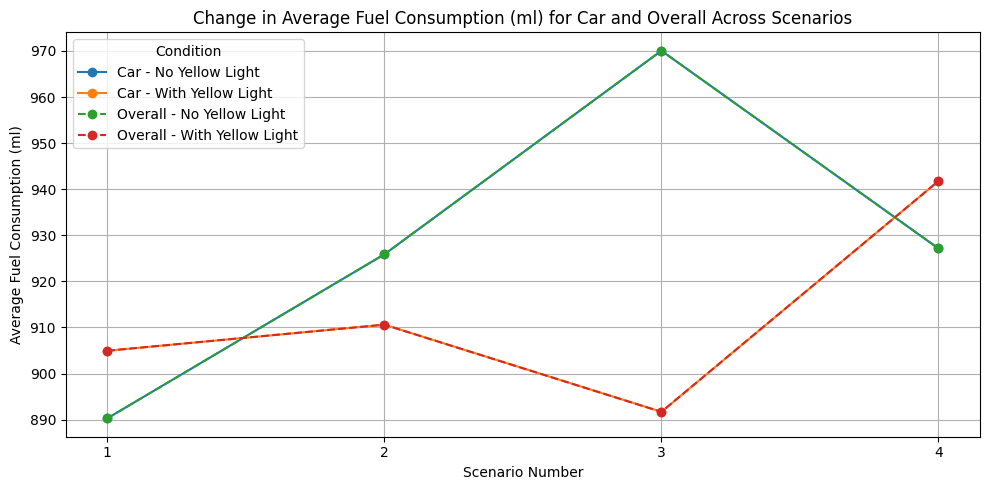

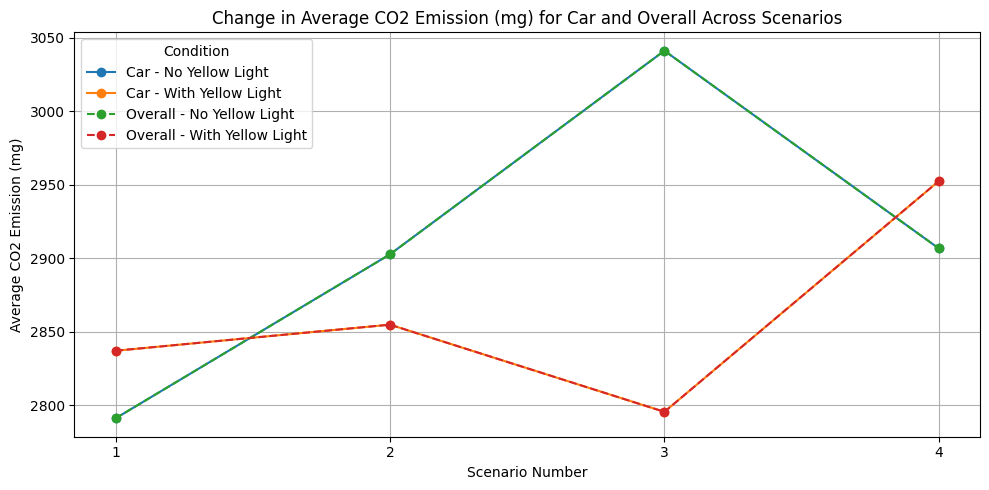

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from google.colab import drive
import os

# Define the directory path where your CSV files are located
directory_path = '/content/drive/MyDrive/sumo_simulation_data/'

# Define the pattern for CSV files
file_path_pattern = os.path.join(directory_path, 'simulation_results_*.csv')

# Get a list of all matching files
file_list = glob.glob(file_path_pattern)

# Initialize a DataFrame list to collect data
data_frames = []

# Load each CSV file into a DataFrame and append to the list
for file_path in file_list:
    print(f"Reading file: {file_path}")
    df = pd.read_csv(file_path)
    df['Scenario Number'] = len(data_frames) + 1  # Add a scenario number for each file
    data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# Print the combined DataFrame's head to verify the data
print(combined_df.head())

# Function to plot data for each vehicle type
def plot_vehicle_data(parameter_name, y_label):
    vehicle_types = ['car']
    light_conditions = ['No Yellow Light', 'With Yellow Light']

    for vehicle_type in vehicle_types:
        plt.figure(figsize=(10,5))

        # Plot for each vehicle type with light conditions
        for light_condition in light_conditions:
            # Vehicle type data
            subset_df = combined_df[(combined_df['Vehicle Type'].str.lower() == vehicle_type) & combined_df['Scenario'].str.contains(light_condition)]
            avg_values = subset_df.groupby('Scenario Number')[parameter_name].mean()
            plt.plot(avg_values.index, avg_values.values, marker='o', linestyle='-', label=f'{vehicle_type.capitalize()} - {light_condition}')

        # Plot overall averages
        for light_condition in light_conditions:
            subset_df = combined_df[combined_df['Scenario'].str.contains('Overall') & combined_df['Scenario'].str.contains(light_condition)]
            avg_values = subset_df.groupby('Scenario Number')[parameter_name].mean()
            plt.plot(avg_values.index, avg_values.values, marker='o', linestyle='--', label=f'Overall - {light_condition}')

        plt.title(f'Change in {y_label} for {vehicle_type.capitalize()} and Overall Across Scenarios')
        plt.xlabel('Scenario Number')
        plt.ylabel(y_label)
        plt.xticks(avg_values.index)  # Ensure x-axis shows all scenario numbers
        plt.legend(title='Condition')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Plot each parameter for each vehicle type with overall averages
plot_vehicle_data('Avg Trip Duration (s)', 'Average Trip Duration (s)')
plot_vehicle_data('Avg Waiting Time (s)', 'Average Waiting Time (s)')
plot_vehicle_data('Avg Fuel Consumption (ml)', 'Average Fuel Consumption (ml)')
plot_vehicle_data('Avg CO2 Emission (mg)', 'Average CO2 Emission (mg)')


In [ ]:
with_yellow_light_df = combined_df[combined_df['Scenario'].str.contains('With Yellow Light')]
without_yellow_light_df = combined_df[combined_df['Scenario'].str.contains('No Yellow Light')]

avg_waiting_time_with_yellow = with_yellow_light_df.groupby('Scenario Number')['Avg Waiting Time (s)'].mean()
avg_waiting_time_without_yellow = without_yellow_light_df.groupby('Scenario Number')['Avg Waiting Time (s)'].mean()

print("Average Waiting Time (in seconds) for each scenario WITH Yellow Light:")
print(avg_waiting_time_with_yellow)

print("Average Waiting Time (in seconds) for each scenario WITHOUT Yellow Light:")
print(avg_waiting_time_without_yellow)


Average Waiting Time (in seconds) for each scenario WITH Yellow Light:
Scenario Number
1    11.68
2    11.22
3    10.47
4     8.97
Name: Avg Waiting Time (s), dtype: float64
Average Waiting Time (in seconds) for each scenario WITHOUT Yellow Light:
Scenario Number
1    11.74
2    11.27
3    11.50
4     9.06
Name: Avg Waiting Time (s), dtype: float64
